In [4]:
library(tidyverse)

setwd("C:/Soongsil/R/ADP/모의고사 R코드 및 데이터/모의고사 4회")

In [2]:
library(showtext)
font_add_google(name = "Black Han Sans", family = "blackhansans")
showtext_auto()

Loading required package: sysfonts

Loading required package: showtextdb



## 01. 정형 데이터마이닝

### 1) 
- 데이터의 요약값을 보고 NA값이 10,000개 이상인 열을 제외하고 남은 변수 중 NA값이 있는 행을 제거하시오. 그리고 AUS 데이터의 Date 변수를 Date형으로 변환하고, 전처리가 완료된 weatherAUS 데이터를 train(70%), test(30%) 데이터로 분할하시오. (set.seed(6789)를 실행한 후 데이터를 분할하시오.)

In [3]:
weather <- read.csv("weatherAUS.csv")

In [5]:
weather %>% glimpse

Rows: 142,193
Columns: 21
$ Date          <chr> "2008-12-01", "2008-12-02", "2008-12-03", "2008-12-04", ~
$ Location      <chr> "Albury", "Albury", "Albury", "Albury", "Albury", "Albur~
$ MinTemp       <dbl> 13.4, 7.4, 12.9, 9.2, 17.5, 14.6, 14.3, 7.7, 9.7, 13.1, ~
$ MaxTemp       <dbl> 22.9, 25.1, 25.7, 28.0, 32.3, 29.7, 25.0, 26.7, 31.9, 30~
$ Rainfall      <dbl> 0.6, 0.0, 0.0, 0.0, 1.0, 0.2, 0.0, 0.0, 0.0, 1.4, 0.0, 2~
$ WindGustDir   <chr> "W", "WNW", "WSW", "NE", "W", "WNW", "W", "W", "NNW", "W~
$ WindGustSpeed <int> 44, 44, 46, 24, 41, 56, 50, 35, 80, 28, 30, 31, 61, 44, ~
$ WindDir9am    <chr> "W", "NNW", "W", "SE", "ENE", "W", "SW", "SSE", "SE", "S~
$ WindDir3pm    <chr> "WNW", "WSW", "WSW", "E", "NW", "W", "W", "W", "NW", "SS~
$ WindSpeed9am  <int> 20, 4, 19, 11, 7, 19, 20, 6, 7, 15, 17, 15, 28, 24, NA, ~
$ WindSpeed3pm  <int> 24, 22, 26, 9, 20, 24, 24, 17, 28, 11, 6, 13, 28, 20, 22~
$ Humidity9am   <int> 71, 44, 38, 45, 82, 55, 49, 48, 42, 58, 48, 89, 76, 65, ~
$ Humidity3pm 

In [6]:
nas <- c(0)
for (i in 1:ncol(weather)) {
    nas[i] <- sum(is.na(weather[,i]))
}

In [7]:
weather_1 <- weather[, - which(nas > 10000)]
weather_1 %>% dim

[1] 142193     16

In [8]:
weather_2 <- na.omit(weather_1)
weather_2 %>% dim

[1] 128576     16

In [9]:
weather_2$Date <- weather_2$Date %>% as.Date("%Y-%m-%d")

In [10]:
set.seed(6789)
split <- rsample::initial_split(weather_2, prop = 0.7)
train <- rsample::training(split) ; test <- rsample::testing(split)

### 2)
- train 데이터로 종속변수인 RainTomorrow(다음날의 강수 여부)를 예측하는 분류모델을 3개 이상 생성하고 test 데이터에 대한 예측값을 csv파일로 각각 제출하시오.

### 3)
- 생성된 3개의 분류모델에 대해 성과분석을 실시하여 정확도를 비교하여 설명하시오. 또, ROC curve를 그리고 AUC값을 산출하시오.

## 02. 통계분석

### 1)
- pop_density 변수를 factor형 변수로 변환하고, pop_density별 revenues의 평균 차이가 있는지 통계분석을 시행하여 결과를 해석하시오. 만일 대립가설이 채택된다면 사후분석을 실시하고 결과를 해석하시오.

In [42]:
bike <- read.csv("bike_marketing.csv")

In [43]:
bike %>% glimpse

Rows: 172
Columns: 8
$ company_num     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,~
$ google_adwords  <dbl> 65.66, 39.10, 174.81, 34.36, 78.21, 34.19, 225.71, 90.~
$ facebook        <dbl> 47.86, 55.20, 52.01, 61.96, 40.91, 15.09, 15.91, 17.13~
$ twitter         <dbl> 52.46, 77.40, 68.01, 86.86, 30.41, 12.79, 33.31, 34.33~
$ marketing_total <dbl> 166, 172, 295, 183, 150, 62, 275, 141, 287, 158, 148, ~
$ revenues        <dbl> 39.26, 38.90, 49.51, 40.56, 40.21, 38.09, 44.21, 40.23~
$ employees       <int> 5, 7, 11, 7, 9, 3, 10, 6, 6, 4, 7, 9, 10, 6, 12, 6, 10~
$ pop_density     <chr> "High", "Medium", "Medium", "High", "Low", "High", "Lo~


In [44]:
sum(is.na(bike))

[1] 0

In [45]:
bike$pop_density <- as.factor(bike$pop_density)

In [47]:
bike$pop_density %>% levels

[1] "High"   "Low"    "Medium"

In [48]:
bike %>% group_by(pop_density) %>%
    summarise(mean(revenues))

pop_density,mean(revenues)
<fct>,<dbl>
High,44.87769
Low,44.01353
Medium,45.12538


- 귀무가설 : pop_density의 세가지 범주에 대해 revenues의 평균은 모두 같다
- 대립가설 : 귀무가설이 아님

In [49]:
result <- aov(revenues ~ pop_density, data = bike)
summary(result)

             Df Sum Sq Mean Sq F value Pr(>F)
pop_density   2     42   20.87    0.61  0.545
Residuals   169   5781   34.21               

- P-value > 0.05 => 귀무가설 기각불가, 3가지 범주에 대해 revenues의 평균에 통계적으로 유의한 차이가 없다.

In [50]:
TukeyHSD(result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = revenues ~ pop_density, data = bike)

$pop_density
                  diff       lwr      upr     p adj
Low-High    -0.8641629 -3.411892 1.683566 0.7022814
Medium-High  0.2476923 -2.464572 2.959957 0.9746260
Medium-Low   1.1118552 -1.435874 3.659584 0.5578035


- 사후분석 귀무가설 : 집단들 사이의 평균은 같다
- 사후분석 대립가설 : 집단들 사이의 평균은 같지 않다.
- 모든 집단 수준에 대해서 두 집단씩 짝을 지어 각각 다중비교를 수행

- 사후분석 결과 모든 비교에 대해 수정된 P-value > 0.05 => 각각의 비교에 대한 귀무가설을 기각 => 모든 범주에 대해서 revenues의 평균값은 통계적으로 유의한 차이가 없다

### 2)
- google_adwords, facebook, twitter, marketing_total, employees가 revenues에 영향을 미치는지 알아보는 회귀분석을 전진선택법을 사용하여 수행하고 결과를 해석하시오.

In [52]:
lm.mod <- lm(revenues ~ google_adwords + facebook + twitter + marketing_total + employees,
             data = bike)

In [56]:
lm.mod %>% step(direction = "forward") %>% summary

Start:  AIC=262.4
revenues ~ google_adwords + facebook + twitter + marketing_total + 
    employees




Call:
lm(formula = revenues ~ google_adwords + facebook + twitter + 
    marketing_total + employees, data = bike)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7788 -1.2437  0.2024  1.4643  4.2835 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      28.4433     0.5962  47.706  < 2e-16 ***
google_adwords    1.2110     0.5708   2.122 0.035348 *  
facebook          1.3464     0.5714   2.356 0.019618 *  
twitter           1.1724     0.5713   2.052 0.041711 *  
marketing_total  -1.1696     0.5708  -2.049 0.042033 *  
employees         0.3865     0.1042   3.708 0.000284 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.108 on 166 degrees of freedom
Multiple R-squared:  0.8733,	Adjusted R-squared:  0.8695 
F-statistic: 228.9 on 5 and 166 DF,  p-value: < 2.2e-16


- 전진선택법 시행결과, 초기 모형과 동일

- 회귀분석 결과 모든 설명변수가 통계적으로 유의
- 모형의 결정계수는 0.8733 => 모형이 데이터의 87.33%를 설명
- 모형의 F-통계량 P-value < 0.05 => 모형이 통계적으로 유의

추정된 회귀식 : revenues = 28.4433 + 1.211 * google_adwords + 1.3464 * facebook + 1.11724 * twitter - 1.1696 * marketing_total + 0.3865 * employees

### 3)
- 전진선택법을 사용해 변수를 선택한 후 새롭게 생성한 회귀모형에 대한 잔차분석을 수행하고 결과를 해석하시오. 

In [61]:
library(lmtest)
dwtest(lm.mod)


	Durbin-Watson test

data:  lm.mod
DW = 2.1114, p-value = 0.7666
alternative hypothesis: true autocorrelation is greater than 0


- 귀무가설 : 잔차의 독립성 가정 만족
- 더빈왓슨 검정 결과 : 더빈왓슨값 = 2.1114, P-value < 0.7665 => 귀무가설 기각 불가 => 잔차의 독립성 가정만족

In [63]:
shapiro.test(resid(lm.mod))


	Shapiro-Wilk normality test

data:  resid(lm.mod)
W = 0.98658, p-value = 0.0991


- 귀무가설 : 잔차의 정규성 만족
- P-value > 0.05 => 귀무가설 기각 불가 => 잔차의 정규성 만족

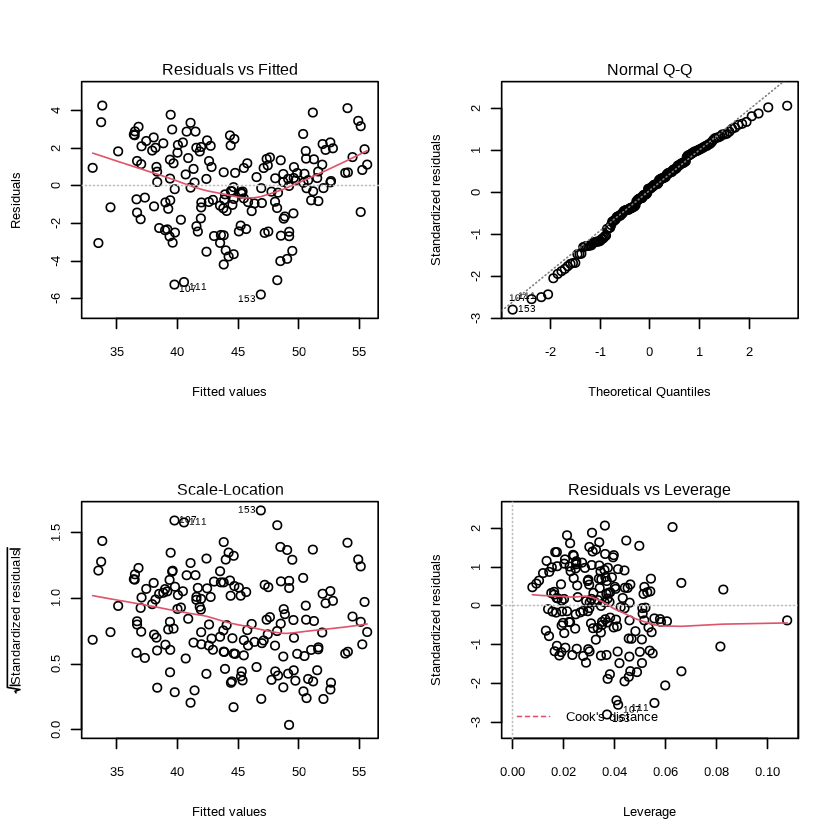

In [62]:
par(mfrow = c(2, 2))
plot(lm.mod)
par(mfrow = c(1,1))

1. 잔차 vs 적합값 분포 (등분산성 가정 확인) : **그래프의 기울기를 나타내는 빨간색 선이 직선의 형태를 가지지 않기에, 평균인 0을 중심으로 고르게 분포한다고 판단하기 어렵다**

2. Q-Q Plot (정규성 가정 확인) : 대각선에서 벗어난 점들이 많이 없는 것으로 보아 데이터가 정규성을 만족

3. Scale_Location (등분산성 가정확인) : 빨간선의 기울기가 0에 가까워야 하지만, 적합값이 커질수록 기울기가 변화함, 빨간선의 기울기가 0에서 떨어진 점이 있다면 해당 점에서는 표준화 잔차가 큼을 의미하고, 회귀 직선이 반응변수를 잘 적합하지 못함을 의미함. 또한 해당 점들은 이상치일 가능성이 있다.

4. 잔차 vs 레버리지 (영향력 진단) : 그래프에서 쿡의 거리가 0.5이상이면 빨간 점선으로 표현되고, 점선 바깥에 있는 점들은 무시할 수 없을 정도로 예측치를 벗어난 관측값이다. 본 그래프에서 그러한 점은 보이지 않으므로 회귀직선에 크게 영향을 끼치는 점들은 드뭄

- **잔차에 대한 주요 3가지 가정 (독립성, 정규성, 등분산성)중에서 등분산성을 만족한다고 보기 힘들기 때문에 본 모형은 활용할 수 없다는 결론**

## 03. 비정형 데이터마이닝

### 1)
- ‘instagram_태교여행.txt’ 데이터를 읽어온 뒤 숫자, 특수 문자 등을 제거하는 전처리 작업을 시행하시오.

In [65]:
library(KoNLP)
library(rJava)
library(tm)
library(wordcloud)
library(plyr)
library(dplyr)

In [66]:
useSejongDic()

Backup was just finished!
370957 words dictionary was built.


In [67]:
insta <- readLines("instagram_태교여행.txt")

In [69]:
clean_txt <- function(txt) {
    txt <- tolower(txt)
    txt <- removePunctuation(txt)
    txt <- removeNumbers(txt)
    txt <- stripWhitespace(txt)
    
    return(txt)
}

In [71]:
insta_clean <- insta %>% clean_txt

### 2)
- 전처리된 데이터에서 “태교여행”이란 단어를 사전에 추가하고 명사를 추출해 출현빈도 10위까지 막대그래프로 시각화하시오. 

In [73]:
buildDictionary(ext_dic = "woorimalsam", 
                user_dic = data.frame("태교여행", "ncn"),
                replace_usr_dic = T)

629898 words dictionary was built.


In [76]:
noun <- extractNoun(insta_clean)

In [93]:
wordcount <- unlist(noun) %>% table %>% as.data.frame()

In [97]:
wordcount$. <- as.character(wordcount$.)

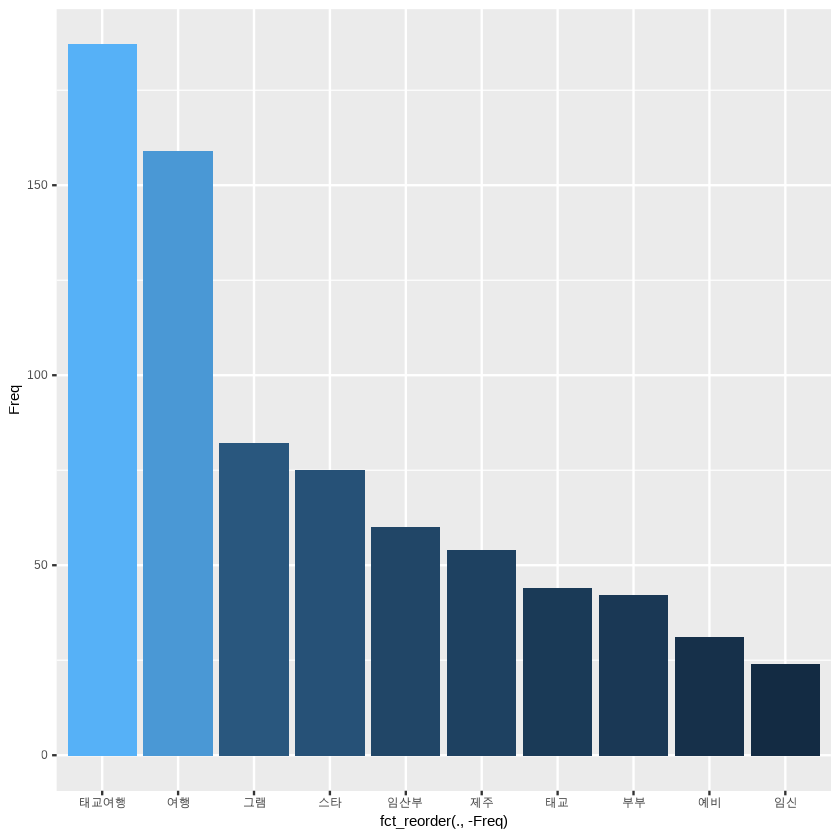

In [103]:
wordcount %>% filter(nchar(.) >= 2) %>%
    arrange(-Freq) %>%
    head(10) %>%
    ggplot(aes(fct_reorder(., -Freq), Freq)) + geom_col(aes(fill = Freq)) + 
    theme(legend.position = "none")

### 3)
- 전처리된 데이터를 이용해 워드클라우드를 작성하고 인사이트를 추출하시오.

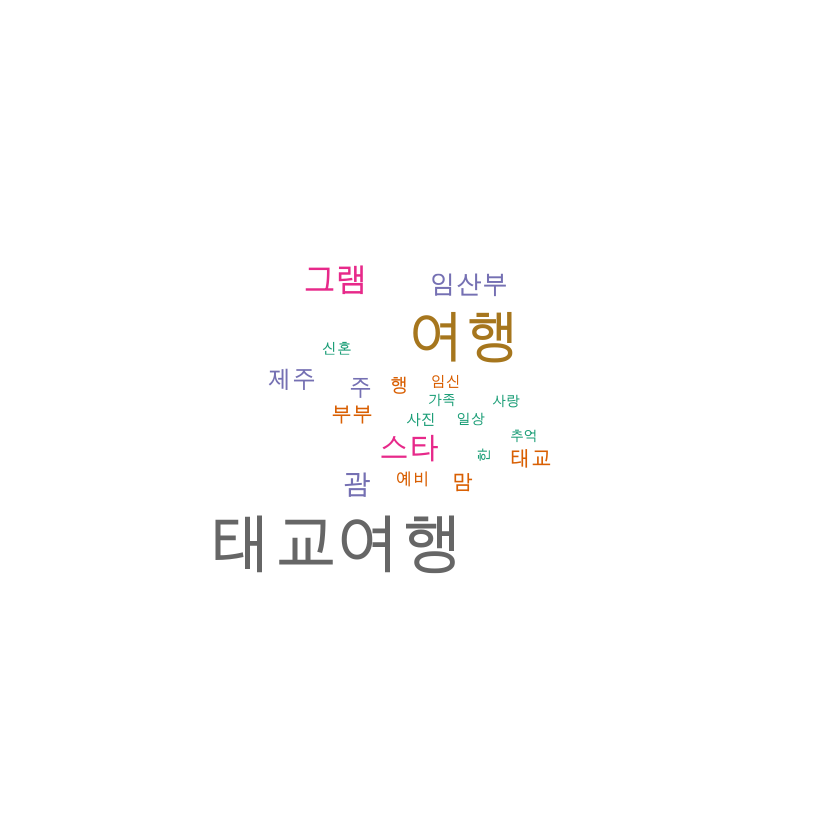

In [105]:
a <- wordcount %>% arrange(-Freq)
wordcloud(a[, 1], a[, 2],
          color = brewer.pal(8, "Dark2"), min.freq = 20)